In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path="/Users/haniawattar/Desktop/group19"
path="/home/user/Documents/Gitlab/AMI/group19"
folder_struct="/data/raw_data/"

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_rows', None)

In [2]:
# get latest dataset & load
df = pd.read_csv('https://aqicn.org/data-platform/covid19/report/15328-e2c2db48/2020', header=4, delimiter=',', sep=',')
df.head()

Date Country       City       Specie  count   min   max  median  \
0  2020-01-07      LA  Vientiane  temperature     18  19.0  32.0    25.5   
1  2020-05-09      LA  Vientiane  temperature     17  25.0  39.0    34.5   
2  2020-07-08      LA  Vientiane  temperature     15  24.5  35.0    31.0   
3  2020-07-12      LA  Vientiane  temperature     17  26.0  30.0    29.0   
4  2020-04-21      LA  Vientiane  temperature     14  26.0  40.0    35.5   

   variance  
0    210.95  
1    255.64  
2     93.10  
3     19.23  
4    208.64

In [4]:
# save dataset to csv file
df.to_csv(path+folder_struct+'waqi-covid19-airqualitydata-2020.csv', sep=',', index=False)

In [7]:
# read in latest file
df = pd.read_csv(path+folder_struct+'waqi-covid19-airqualitydata-2020.csv', header=0, delimiter=',', sep=',')
df.head()

Date Country       City       Specie  count   min   max  median  \
0  2020-01-07      LA  Vientiane  temperature     18  19.0  32.0    25.5   
1  2020-05-09      LA  Vientiane  temperature     17  25.0  39.0    34.5   
2  2020-07-08      LA  Vientiane  temperature     15  24.5  35.0    31.0   
3  2020-07-12      LA  Vientiane  temperature     17  26.0  30.0    29.0   
4  2020-04-21      LA  Vientiane  temperature     14  26.0  40.0    35.5   

   variance  
0    210.95  
1    255.64  
2     93.10  
3     19.23  
4    208.64

In [8]:
df["Date"] = pd.to_datetime(df['Date'])

In [9]:
df.sort_values("Date", ascending=True)

Date Country         City      Specie  count   min    max  \
115362  2019-12-30      CA  Mississauga        pm25     58   5.0   25.0   
1149561 2019-12-30      NL    Groningen         no2     48   8.6   23.0   
162434  2019-12-30      JP     Kanazawa         no2    274   1.0   30.6   
794791  2019-12-30      MX  Guadalajara        pm10    164   2.0  131.0   
1115966 2019-12-30      GB      Glasgow          o3    143  13.0   30.9   
...            ...     ...          ...         ...    ...   ...    ...   
800121  2020-07-31      MX       Puebla  wind-speed      5   0.8    2.6   
28560   2020-07-31      CL      Quilpué    humidity      3  76.0   81.0   
1135314 2020-07-31      NL     Nijmegen   wind-gust     20   1.2    6.2   
685304  2020-07-31      RO      Piteşti         so2     48   0.8    7.8   
1164796 2020-07-31      FR     Besançon        pm25      6  20.0   48.0   

         median  variance  
115362      9.0    288.06  
1149561    13.4    177.26  
162434      5.6    410.35  
794791     36.0   5904.80  
1115966    21.6    203.70  
...         ...       ...  
800121      2.0      7.02  
28560      81.0     83.33  
1135314     2.0     24.38  
685304      6.1     30.01  
1164796    41.0    997.67  

[1256629 rows x 9 columns]

#### 1. No Nan values

In [10]:
df.isna().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

#### 2. Type of Species (Drop some Species since they dont have a lot of measurements)

In [11]:
df["Specie"].value_counts()

temperature      118470
humidity         118456
pressure         117988
pm25             109226
pm10             106130
no2              105487
o3                98368
dew               92308
so2               88530
co                81132
wind-speed        76252
wind speed        44075
wind-gust         42177
wind gust         28267
precipitation     13353
wd                 8902
aqi                3092
uvi                2240
pm1                 816
pol                 715
neph                430
mepaqi              215
Name: Specie, dtype: int64

In [12]:
condition = ((df["Specie"]== "wd") | (df["Specie"]== "aqi") | (df["Specie"]== "uvi") | (df["Specie"]== "pm1") | (df["Specie"]== "aqi") | (df["Specie"]== "pol") | (df["Specie"]== "neph")  | (df["Specie"]== "mepaqi"))

In [13]:
df = df.drop(df[condition].index)

In [14]:
len(df)

1240219

#### 3. Replace duplicates names

In [15]:
df["Specie"].replace(to_replace="wind gust", value = "wind-gust", inplace=True)
df["Specie"].replace(to_replace="wind speed", value = "wind-speed", inplace=True)

In [16]:
df["Specie"].value_counts()

wind-speed       120327
temperature      118470
humidity         118456
pressure         117988
pm25             109226
pm10             106130
no2              105487
o3                98368
dew               92308
so2               88530
co                81132
wind-gust         70444
precipitation     13353
Name: Specie, dtype: int64

#### 4.  Drop rows that dont have a lot of counts (for interpolation reasons - might not be needed) - fow now the threshold for count is 5.

In [17]:
print((df["count"] < 5).sum(), "rows will be dropped since they dont include a lot of measurements (<5)")

17509 rows will be dropped since they dont include a lot of measurements (<5)


In [18]:
print("which is equal to", (df["count"]< 5).sum()/len(df) * 100 ," % of the dataframe")

which is equal to 1.4117667928003037  % of the dataframe


In [19]:
df.drop(df[df["count"] < 5].index, inplace = True)

In [20]:
len(df)

1222710

#### 5. Delete unneeded columns (count, min, max, variance)

In [21]:
df = df.drop(columns=["count", "min", "max", "variance"])
df

Date Country             City       Specie  median
0       2020-01-07      LA        Vientiane  temperature    25.5
1       2020-05-09      LA        Vientiane  temperature    34.5
2       2020-07-08      LA        Vientiane  temperature    31.0
3       2020-07-12      LA        Vientiane  temperature    29.0
4       2020-04-21      LA        Vientiane  temperature    35.5
...            ...     ...              ...          ...     ...
1256624 2020-06-02      UA  Ivano-Frankivsk          dew     5.0
1256625 2020-07-22      UA  Ivano-Frankivsk          dew    12.0
1256626 2020-02-09      UA  Ivano-Frankivsk          dew   -12.0
1256627 2020-06-30      UA  Ivano-Frankivsk          dew    14.0
1256628 2020-07-09      UA  Ivano-Frankivsk          dew    13.0

[1222710 rows x 5 columns]

---

#### 6. Split into Specie

#### Example: df_species["temperature"]

In [22]:
df["Specie"].value_counts()

wind-speed       119774
temperature      118206
humidity         118186
pressure         117723
pm25             109004
pm10             105208
no2              104810
o3                97418
dew               91839
so2               85180
co                79509
wind-gust         66468
precipitation      9385
Name: Specie, dtype: int64

In [23]:
species = list(df.Specie.unique())
print(len(species), species)
print("  ")
countries = list(df.Country.unique())
print(len(countries), countries)
print("  ")
cities = list(df.City.unique())
print(len(cities), cities)

13 ['temperature', 'humidity', 'wind-speed', 'pm25', 'dew', 'pressure', 'co', 'no2', 'wind-gust', 'pm10', 'o3', 'so2', 'precipitation']
  
95 ['LA', 'LK', 'BG', 'BR', 'CL', 'CW', 'GE', 'KR', 'MN', 'SE', 'CA', 'DZ', 'ET', 'GT', 'IL', 'IS', 'UG', 'AF', 'DK', 'JP', 'KG', 'ML', 'SA', 'SG', 'BA', 'BD', 'GR', 'HU', 'KZ', 'PE', 'TH', 'TM', 'TR', 'VN', 'CI', 'CN', 'IN', 'LT', 'NZ', 'US', 'GH', 'HR', 'MM', 'PH', 'PK', 'PT', 'CO', 'KW', 'RO', 'AE', 'DE', 'FI', 'UZ', 'CH', 'CZ', 'GN', 'IQ', 'MK', 'TW', 'MX', 'RE', 'RS', 'SK', 'AR', 'AU', 'MO', 'XK', 'SV', 'ZA', 'AT', 'BE', 'BH', 'IE', 'MY', 'NO', 'CY', 'IR', 'IT', 'EE', 'HK', 'PR', 'RU', 'TJ', 'NP', 'BO', 'ES', 'GB', 'ID', 'JO', 'NL', 'CR', 'EC', 'FR', 'PL', 'UA']
  
615 ['Vientiane', 'Colombo', 'Sofia', 'Burgas', 'Plovdiv', 'São José dos Campos', 'Vitória', 'São Paulo', 'Rancagua', 'Osorno', 'Los Ángeles', 'Chillán', 'Calama', 'Puerto Montt', 'Valparaíso', 'Quilpué', 'Santiago', 'Talca', 'Concepción', 'Temuco', 'Willemstad', 'Tbilisi', 'Jeonju',

In [24]:
df_species = {}

for specie in species:
    condition = df["Specie"] == specie
    print(specie)
    print(df[condition])
    df_species[specie] = df[condition]
    #for city in cities:
     #   condition = df_species[specie].City == city
      #  print(df_species[condition])

#### 7. Split into cities - nested dictionary of dataframes
####  There is a dataframe for each city and specie. Example: df_species_cities[temperature_Kabul_AF]
Added country at the end because there are cities with the same name in different countries (London & Hamilton) which causes problems when interpolating.

In [255]:
df_species_cities = {}

for key, value in df_species.items():
    for city in cities:
            condition = value.City == city
            # don't save empty dfs
            if len(condition.unique()) == 1:
                continue
            # special case bc same city names in different countries
            if city == 'London' or city == 'Hamilton':
                df_temp = value[condition]
                temp_countries = df_temp.Country.unique()
                for country in temp_countries:
                    condition = df_temp.Country == country
                    df_species_cities[key+"_"+city+"_"+country] = df_temp[condition]
            else:
                country = value[condition].Country.unique()
                df_species_cities[key+"_"+city+"_"+country[0]] = value[condition]

In [239]:
len(df_species_cities.keys())

6677

In [240]:
df_species_cities.keys()

dict_keys(['temperature_Vientiane_LA', 'temperature_Colombo_LK', 'temperature_Sofia_BG', 'temperature_Burgas_BG', 'temperature_Plovdiv_BG', 'temperature_São José dos Campos_BR', 'temperature_Vitória_BR', 'temperature_São Paulo_BR', 'temperature_Rancagua_CL', 'temperature_Osorno_CL', 'temperature_Los Ángeles_CL', 'temperature_Chillán_CL', 'temperature_Calama_CL', 'temperature_Puerto Montt_CL', 'temperature_Valparaíso_CL', 'temperature_Quilpué_CL', 'temperature_Santiago_CL', 'temperature_Talca_CL', 'temperature_Concepción_CL', 'temperature_Temuco_CL', 'temperature_Willemstad_CW', 'temperature_Tbilisi_GE', 'temperature_Jeonju_KR', 'temperature_Seoul_KR', 'temperature_Busan_KR', 'temperature_Sejong_KR', 'temperature_Ulsan_KR', 'temperature_Yeosu_KR', 'temperature_Gwangju_KR', 'temperature_Seongnam-si_KR', 'temperature_Daejeon_KR', 'temperature_Pohang_KR', 'temperature_Changwon_KR', 'temperature_Suwon_KR', 'temperature_Cheongju-si_KR', 'temperature_Chuncheon_KR', 'temperature_Daegu_KR', 'te

In [76]:
df_species_cities["so2_Changwon_KR"]

Date Country      City Specie  median   datetime
Date                                                             
2020-02-29 2020-02-29      KR  Changwon    so2     4.3 2020-02-29
2020-03-13 2020-03-13      KR  Changwon    so2     4.3 2020-03-13
2020-04-12 2020-04-12      KR  Changwon    so2     4.3 2020-04-12
2020-05-05 2020-05-05      KR  Changwon    so2     4.3 2020-05-05
2020-05-13 2020-05-13      KR  Changwon    so2     4.3 2020-05-13
...               ...     ...       ...    ...     ...        ...
2020-02-09 2020-02-09      KR  Changwon    so2     5.8 2020-02-09
2020-02-27 2020-02-27      KR  Changwon    so2     4.3 2020-02-27
2020-01-29 2020-01-29      KR  Changwon    so2     4.3 2020-01-29
2020-04-21 2020-04-21      KR  Changwon    so2     4.3 2020-04-21
2020-06-04 2020-06-04      KR  Changwon    so2     4.3 2020-06-04

[168 rows x 6 columns]

---

#### 8. Exploring data

In [27]:
df_new = df_species_cities.copy()

In [30]:
df_species_cities

{'temperature_Vientiane':            Country       City       Specie  median
 Date                                              
 2020-01-07      LA  Vientiane  temperature    25.5
 2020-05-09      LA  Vientiane  temperature    34.5
 2020-07-08      LA  Vientiane  temperature    31.0
 2020-07-12      LA  Vientiane  temperature    29.0
 2020-04-21      LA  Vientiane  temperature    35.5
 ...            ...        ...          ...     ...
 2020-06-25      LA  Vientiane  temperature    30.0
 2020-01-23      LA  Vientiane  temperature    27.0
 2020-03-02      LA  Vientiane  temperature    28.0
 2020-03-27      LA  Vientiane  temperature    30.0
 2020-04-12      LA  Vientiane  temperature    31.0
 
 [176 rows x 4 columns],
 'temperature_Colombo':            Country     City       Specie  median
 Date                                            
 2020-06-29      LK  Colombo  temperature    28.0
 2020-02-06      LK  Colombo  temperature    28.0
 2020-02-08      LK  Colombo  temperature    27.0

In [29]:
df_new

{'temperature_Vientiane':            Country       City       Specie  median
 Date                                              
 2020-01-07      LA  Vientiane  temperature    25.5
 2020-05-09      LA  Vientiane  temperature    34.5
 2020-07-08      LA  Vientiane  temperature    31.0
 2020-07-12      LA  Vientiane  temperature    29.0
 2020-04-21      LA  Vientiane  temperature    35.5
 ...            ...        ...          ...     ...
 2020-06-25      LA  Vientiane  temperature    30.0
 2020-01-23      LA  Vientiane  temperature    27.0
 2020-03-02      LA  Vientiane  temperature    28.0
 2020-03-27      LA  Vientiane  temperature    30.0
 2020-04-12      LA  Vientiane  temperature    31.0
 
 [176 rows x 4 columns],
 'temperature_Colombo':            Country     City       Specie  median
 Date                                            
 2020-06-29      LK  Colombo  temperature    28.0
 2020-02-06      LK  Colombo  temperature    28.0
 2020-02-08      LK  Colombo  temperature    27.0

In [28]:
for key, value in df_new.items():
    value["Date"] = pd.to_datetime(value['Date'])
    value.index = value['Date']
    value.drop(columns=["Date"], inplace=True)
print(value)

/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Empty DataFrame
Columns: [Country, City, Specie, median]
Index: []


# Exploration of Co data

## Paris

In [42]:
df_new["co_Paris"].sort_values("Date", ascending=True)

Date Country   City Specie  median
datetime                                           
2019-12-30 2019-12-30      FR  Paris     co     0.1
2019-12-31 2019-12-31      FR  Paris     co     0.1
2020-01-01 2020-01-01      FR  Paris     co     0.1
2020-01-02 2020-01-02      FR  Paris     co     0.1
2020-01-03 2020-01-03      FR  Paris     co     0.1
...               ...     ...    ...    ...     ...
2020-06-10 2020-06-10      FR  Paris     co     0.1
2020-06-11 2020-06-11      FR  Paris     co     0.1
2020-06-12 2020-06-12      FR  Paris     co     0.1
2020-06-13 2020-06-13      FR  Paris     co     0.1
2020-06-14 2020-06-14      FR  Paris     co     0.1

[168 rows x 5 columns]

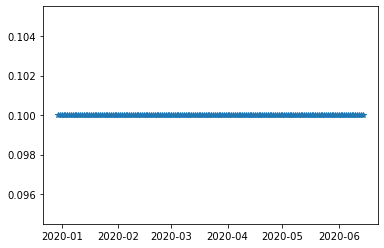

In [43]:
plt.plot(df_new["co_Paris"]["Date"], df_new["co_Paris"]["median"], '*')
#plt.xticks(rotation='vertical')


In [38]:
df_new["co_Paris"]["median"].var()

0.0

## Sydney

In [44]:
df_new["co_Sydney"].sort_values("Date", ascending=True)

Country    City Specie  median
Date                                     
2019-12-30      AU  Sydney     co     3.4
2019-12-31      AU  Sydney     co     4.5
2020-01-01      AU  Sydney     co     2.3
2020-01-02      AU  Sydney     co     3.4
2020-01-03      AU  Sydney     co     3.4
...            ...     ...    ...     ...
2020-07-27      AU  Sydney     co     2.3
2020-07-28      AU  Sydney     co     2.3
2020-07-29      AU  Sydney     co     3.4
2020-07-30      AU  Sydney     co     2.3
2020-07-31      AU  Sydney     co     2.3

[210 rows x 4 columns]

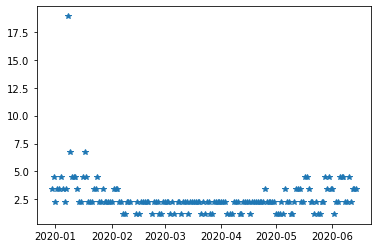

In [47]:
plt.plot(df_new["co_Sydney"]["Date"], df_new["co_Sydney"]["median"], '*')
#plt.xticks(rotation='vertical')


In [50]:
df_new["co_Sydney"]["median"].var()

2.722850867227145

### Delete all dfs with too low variance

In [40]:
# get rid of empty dataframes and implausible dataframes
to_delete = []
for key, value in df_new.items():
    var = value['median'].var()
    if var < 0.2 or np.isnan(var):
        to_delete.append(key)

for key in to_delete:
    df_new.pop(key);

In [42]:
len(df_new)

6406

---


### Interpolation of the median for df_new["pm10_Toulouse"]

In [45]:
df_new["pm10_Toulouse"] = df_new["pm10_Toulouse"].sort_values("Date", ascending=True)

In [46]:
df_new["pm10_Toulouse"]

Country      City Specie  median
Date                                       
2019-12-30      FR  Toulouse   pm10    17.0
2019-12-31      FR  Toulouse   pm10    22.0
2020-01-01      FR  Toulouse   pm10    20.0
2020-01-02      FR  Toulouse   pm10    21.0
2020-01-03      FR  Toulouse   pm10    29.0
...            ...       ...    ...     ...
2020-07-27      FR  Toulouse   pm10    17.0
2020-07-28      FR  Toulouse   pm10    14.0
2020-07-29      FR  Toulouse   pm10    15.0
2020-07-30      FR  Toulouse   pm10    23.0
2020-07-31      FR  Toulouse   pm10    16.0

[215 rows x 4 columns]

In [47]:
df_new["pm10_Toulouse"].index.min()

Timestamp('2019-12-30 00:00:00')

In [48]:
df_reindexed = df_new["pm10_Toulouse"].reindex(pd.date_range(start=df_new["pm10_Toulouse"].index.min(),
                                                  end=df_new["pm10_Toulouse"].index.max(),
                                                  freq='1D')) 

In [49]:
df_reindexed

Country      City Specie  median
2019-12-30      FR  Toulouse   pm10    17.0
2019-12-31      FR  Toulouse   pm10    22.0
2020-01-01      FR  Toulouse   pm10    20.0
2020-01-02      FR  Toulouse   pm10    21.0
2020-01-03      FR  Toulouse   pm10    29.0
...            ...       ...    ...     ...
2020-07-27      FR  Toulouse   pm10    17.0
2020-07-28      FR  Toulouse   pm10    14.0
2020-07-29      FR  Toulouse   pm10    15.0
2020-07-30      FR  Toulouse   pm10    23.0
2020-07-31      FR  Toulouse   pm10    16.0

[215 rows x 4 columns]

In [337]:
df_reindexed.isna().sum()

Date       34
Country    34
City       34
Specie     34
median     34
dtype: int64

In [50]:
df_reindexed["median"].interpolate(method='linear')

2019-12-30    17.0
2019-12-31    22.0
2020-01-01    20.0
2020-01-02    21.0
2020-01-03    29.0
              ... 
2020-07-27    17.0
2020-07-28    14.0
2020-07-29    15.0
2020-07-30    23.0
2020-07-31    16.0
Freq: D, Name: median, Length: 215, dtype: float64

In [51]:
df_reindexed

Country      City Specie  median
2019-12-30      FR  Toulouse   pm10    17.0
2019-12-31      FR  Toulouse   pm10    22.0
2020-01-01      FR  Toulouse   pm10    20.0
2020-01-02      FR  Toulouse   pm10    21.0
2020-01-03      FR  Toulouse   pm10    29.0
...            ...       ...    ...     ...
2020-07-27      FR  Toulouse   pm10    17.0
2020-07-28      FR  Toulouse   pm10    14.0
2020-07-29      FR  Toulouse   pm10    15.0
2020-07-30      FR  Toulouse   pm10    23.0
2020-07-31      FR  Toulouse   pm10    16.0

[215 rows x 4 columns]

In [55]:
df_reindexed.isna().sum()

Country    0
City       0
Specie     0
median     0
dtype: int64

---

### 9. Get rid of unplausible data

In [256]:
for key, value in df_species_cities.items():
    value["Date"] = pd.to_datetime(value['Date'])
    value.index = value['Date']
    value.drop(columns=["Date"], inplace=True)

/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [257]:
# get rid of empty dataframes and implausible dataframes
to_delete = []
for key, value in df_species_cities.items():
    var = value['median'].var()
    if var < 0.2 or np.isnan(var):
        to_delete.append(key)

for key in to_delete:
    df_species_cities.pop(key);

In [259]:
len(df_species_cities)

6420

---

### 10. Check how many missing values and get rid if too many

In [258]:
i = 0
for key, value in df_species_cities.items():
    print(key)
    print(len(value))
    length =  len(value)
    if length > 190:
        i = i+1

temperature_Vientiane_LA
176
temperature_Colombo_LK
195
temperature_Sofia_BG
195
temperature_Burgas_BG
185
temperature_Plovdiv_BG
186
temperature_São José dos Campos_BR
195
temperature_Vitória_BR
195
temperature_São Paulo_BR
206
temperature_Rancagua_CL
194
temperature_Osorno_CL
195
temperature_Los Ángeles_CL
191
temperature_Chillán_CL
191
temperature_Calama_CL
195
temperature_Puerto Montt_CL
194
temperature_Valparaíso_CL
196
temperature_Quilpué_CL
194
temperature_Santiago_CL
195
temperature_Talca_CL
195
temperature_Concepción_CL
196
temperature_Temuco_CL
190
temperature_Willemstad_CW
169
temperature_Tbilisi_GE
195
temperature_Jeonju_KR
196
temperature_Seoul_KR
196
temperature_Busan_KR
196
temperature_Sejong_KR
196
temperature_Ulsan_KR
196
temperature_Yeosu_KR
196
temperature_Gwangju_KR
196
temperature_Seongnam-si_KR
194
temperature_Daejeon_KR
196
temperature_Pohang_KR
196
temperature_Changwon_KR
196
temperature_Suwon_KR
197
temperature_Cheongju-si_KR
196
temperature_Chuncheon_KR
196
te

200
wind-speed_Bydgoszcz_PL
199
wind-speed_Zabrze_PL
200
wind-speed_Wrocław_PL
200
wind-speed_Płock_PL
200
wind-speed_Kraków_PL
200
wind-speed_Odessa_UA
179
wind-speed_Ternopil_UA
141
wind-speed_Kyiv_UA
201
wind-speed_Kamianske_UA
196
wind-speed_Dnipro_UA
207
wind-speed_Zaporizhia_UA
197
wind-speed_Lviv_UA
196
wind-speed_Kryvyi Rih_UA
198
wind-speed_Ivano-Frankivsk_UA
197
pm25_Vientiane_LA
194
pm25_Colombo_LK
214
pm25_São José dos Campos_BR
210
pm25_Vitória_BR
213
pm25_São Paulo_BR
215
pm25_Rancagua_CL
215
pm25_Osorno_CL
215
pm25_Los Ángeles_CL
214
pm25_Chillán_CL
215
pm25_Calama_CL
215
pm25_Puerto Montt_CL
215
pm25_Valparaíso_CL
215
pm25_Quilpué_CL
214
pm25_Santiago_CL
215
pm25_Talca_CL
215
pm25_Concepción_CL
215
pm25_Temuco_CL
215
pm25_Willemstad_CW
173
pm25_Tbilisi_GE
149
pm25_Jeonju_KR
215
pm25_Seoul_KR
215
pm25_Busan_KR
215
pm25_Sejong_KR
215
pm25_Ulsan_KR
215
pm25_Yeosu_KR
215
pm25_Gwangju_KR
215
pm25_Seongnam-si_KR
215
pm25_Daejeon_KR
215
pm25_Pohang_KR
215
pm25_Changwon_KR
215


no2_Yazd_IR
132
no2_Kerman_IR
21
no2_Tabriz_IR
215
no2_Bandar Abbas_IR
113
no2_Sanandaj_IR
210
no2_Kermanshah_IR
203
no2_Khorramabad_IR
214
no2_Shiraz_IR
214
no2_Zanjān_IR
172
no2_Mashhad_IR
10
no2_Tehran_IR
215
no2_Bologna_IT
213
no2_Livorno_IT
207
no2_Modena_IT
213
no2_Prato_IT
207
no2_Florence_IT
206
no2_Naples_IT
214
no2_Rome_IT
212
no2_Milan_IT
211
no2_Brescia_IT
211
no2_Parma_IT
213
no2_Tallinn_EE
215
no2_Hong Kong_HK
215
no2_Chelyabinsk_RU
123
no2_Nizhniy Novgorod_RU
178
no2_Saint Petersburg_RU
118
no2_Krasnoyarsk_RU
215
no2_Novosibirsk_RU
192
no2_Moscow_RU
181
no2_Cochabamba_BO
179
no2_Las Palmas de Gran Canaria_ES
207
no2_Salamanca_ES
215
no2_Barcelona_ES
215
no2_Donostia / San Sebastián_ES
215
no2_Gasteiz / Vitoria_ES
215
no2_Córdoba_ES
215
no2_Valladolid_ES
213
no2_Santander_ES
215
no2_Palma_ES
202
no2_Málaga_ES
215
no2_Zaragoza_ES
213
no2_Sevilla_ES
215
no2_Bilbao_ES
215
no2_Pamplona_ES
215
no2_Castelló de la Plana_ES
202
no2_Huelva_ES
215
no2_Granada_ES
215
no2_Madrid_ES
2

so2_Perth_AU
91
so2_Wollongong_AU
122
so2_Pristina_XK
212
so2_Middelburg_ZA
213
so2_Pretoria_ZA
215
so2_East London_ZA
212
so2_Johannesburg_ZA
215
so2_Bloemfontein_ZA
198
so2_Cape Town_ZA
185
so2_Vereeniging_ZA
215
so2_Klerksdorp_ZA
161
so2_Richards Bay_ZA
215
so2_Port Elizabeth_ZA
190
so2_Worcester_ZA
111
so2_Salzburg_AT
212
so2_Linz_AT
215
so2_Innsbruck_AT
119
so2_Liège_BE
155
so2_Gent_BE
19
so2_Antwerpen_BE
155
so2_Dublin_IE
132
so2_Nicosia_CY
215
so2_Limassol_CY
202
so2_Arāk_IR
207
so2_Karaj_IR
210
so2_Qom_IR
167
so2_Orūmīyeh_IR
198
so2_Yazd_IR
110
so2_Khorramshahr_IR
175
so2_Tabriz_IR
211
so2_Sanandaj_IR
205
so2_Kermanshah_IR
39
so2_Khorramabad_IR
181
so2_Shiraz_IR
215
so2_Mashhad_IR
81
so2_Tehran_IR
215
so2_Trieste_IT
180
so2_Naples_IT
214
so2_Milan_IT
211
so2_Brescia_IT
196
so2_Nizhniy Novgorod_RU
171
so2_Saint Petersburg_RU
118
so2_Krasnoyarsk_RU
215
so2_Novosibirsk_RU
181
so2_Las Palmas de Gran Canaria_ES
206
so2_Salamanca_ES
210
so2_Valladolid_ES
203
so2_Santander_ES
172
so2_

In [260]:
print("There are", i, "dataframes that include measureents for more than 190 days ")

There are 5124 dataframes that include measureents for more than 190 days 


In [261]:
value_0 = 0
value_between_1_20 = 0
value_between_20_90 = 0
value_between_90_130 = 0
value_between_130_160 = 0
value_between_160_168 = 0
value_gt168 = 0

for key, value in df_species_cities.items():
    if len(value) == 0:
        value_0 = value_0 +1
    if len(value) > 0 and len(value) < 21:
        value_between_1_20 = value_between_1_20 +1
    if len(value) >20 and len(value) <91:
        value_between_20_90 = value_between_20_90 +1
    if (len(value)>90 and (len(value)<131)):
        value_between_90_130 = value_between_90_130 +1
        print(key)
    if (len(value)>130 and (len(value)<161)):
        value_between_130_160 = value_between_130_160 +1
    if (len(value)>160 and (len(value)<168)):
        value_between_160_168 = value_between_160_168 +1
    if len(value) >= 168:
        value_gt168 = value_168 +1

                    
print("0 (no data at all): ", value_0)
print("value_between_1_20: ", value_between_1_20)
print("value_between_20_90: ", value_between_20_90)
print("value_between_90_130:", value_between_90_130)
print("value_between_130_160:", value_between_130_160)
print("value_between_160_168: ", value_between_160_168)
print("value greater than 168: ",value_gt168)

temperature_Haiphong_VN
temperature_Accra_GH
temperature_Worcester_ZA
temperature_Bandar Abbas_IR
temperature_Saint Petersburg_RU
humidity_Haiphong_VN
humidity_Accra_GH
humidity_Worcester_ZA
humidity_Bandar Abbas_IR
humidity_Saint Petersburg_RU
wind-speed_Haiphong_VN
wind-speed_Accra_GH
wind-speed_Novi Sad_RS
wind-speed_Worcester_ZA
wind-speed_Bandar Abbas_IR
wind-speed_Florence_IT
wind-speed_Saint Petersburg_RU
wind-speed_Leeds_GB
pm25_Haiphong_VN
pm25_Richmond_US
pm25_Accra_GH
pm25_Köln_DE
pm25_Düsseldorf_DE
pm25_San Luis Potosí_MX
pm25_Khorramshahr_IR
pm25_Saint Petersburg_RU
dew_Saitama_JP
dew_Antakya_TR
dew_Haiphong_VN
dew_Oklahoma City_US
dew_Richmond_US
dew_Salt Lake City_US
dew_Accra_GH
dew_Graz_AT
dew_Namur_BE
dew_Stavanger_NO
dew_Bandar Abbas_IR
dew_Pokhara_NP
dew_Biratnagar_NP
dew_Las Palmas de Gran Canaria_ES
pressure_Haiphong_VN
pressure_Accra_GH
pressure_Bandar Abbas_IR
pressure_Saint Petersburg_RU
pressure_Pokhara_NP
co_Detroit_US
co_Baguio_PH
co_Aguascalientes_MX
co_Wor

In [266]:
# get rid of all data with less than 130 entries
to_delete = []
for key, value in df_species_cities.items():
    if len(value) < 130:
        to_delete.append(key)
        
for key in to_delete:
    df_species_cities.pop(key);

In [263]:
len(df_species_cities)

5707

### 11. get rid of duplicate rows
I have no idea how they are possible?!

In [301]:
for key, value in df_species_cities.items():
    value['datetime'] = value.index
    value.drop_duplicates(subset='datetime', keep='first', inplace=True)
    value.drop(columns=['datetime'], inplace=True)

/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/user/miniconda3/envs/ami/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

### 12. Interpolate the missing data (daily or weekly...)

In [303]:
# interpolate the data
start_date='2020-01-01'
end_date='2020-07-31'
for key, value in df_species_cities.items():
    country = value['Country'][0]
    city = value['City'][0]
    specie = value['Specie'][0]
    #print(key)
    value = value.reindex(pd.date_range(start=start_date, end=end_date, freq='1D')) 
    
    value['Country'].fillna(value=country , axis=0, inplace=True)
    value['City'].fillna(value=city , axis=0, inplace=True)
    value['Specie'].fillna(value=specie , axis=0, inplace=True)
    
    value["median"].interpolate(method='linear')
    value['median'].fillna(method='bfill', axis=0, inplace=True)
    value['median'].fillna(method='ffill', axis=0, inplace=True)

In [308]:
# check if still Nan values in data
for key, value in df_species_cities.items():
    na = value.isna().sum()
    a = na != 0
    if a.any():
        print(na)

### 13. Calculate min, max and mean/median for every country and species

In [185]:
df_species_cities

{'temperature_Vientiane':            Country       City       Specie  median
 2020-01-01      LA  Vientiane  temperature    26.5
 2020-01-02      LA  Vientiane  temperature    26.5
 2020-01-03      LA  Vientiane  temperature    26.5
 2020-01-04      LA  Vientiane  temperature    24.5
 2020-01-05      LA  Vientiane  temperature    24.0
 ...            ...        ...          ...     ...
 2020-07-27      LA  Vientiane  temperature    28.0
 2020-07-28      LA  Vientiane  temperature    28.0
 2020-07-29      LA  Vientiane  temperature    28.0
 2020-07-30      LA  Vientiane  temperature    28.0
 2020-07-31      LA  Vientiane  temperature    28.0
 
 [213 rows x 4 columns],
 'temperature_Colombo':            Country     City       Specie  median
 Date                                            
 2020-06-29      LK  Colombo  temperature    28.0
 2020-02-06      LK  Colombo  temperature    28.0
 2020-02-08      LK  Colombo  temperature    27.0
 2020-04-21      LK  Colombo  temperature    31.0
 

### 14. Merge the data back together

In [ ]:
# merge the data